In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

from blockchain import util
util.TIMEOUT = 20

In [2]:
from blockchain import blockexplorer
from blockutils import BlockUtils
import numpy as np 
from matplotlib import pyplot as plt
from scipy.stats import variation
from scipy.stats import zscore
from scipy.stats import iqr

In [3]:
latest = blockexplorer.get_block(blockexplorer.get_latest_block().hash)
butils = BlockUtils()
#butils.getBlock(latest.height)
#latest = blockexplorer.get_block("0000000000000000000857fad93ae6e401153a94f06c4b5adfb733f20a6c13b1")

In [4]:
butils.writeBlock(latest.json)

son = butils.getBlock(latest.height)

0

In [5]:
butils.local_blocks

['669055', '669051']

In [19]:
blocks = [latest]
prev = []
prevHash = None
for i in range(0,50):
    prevHash=blocks[0].previous_block
    b = blockexplorer.get_block(prevHash)
    blocks.insert(0,b)
    prev = b.previous_block

In [37]:
txs=[block.transactions for block in blocks]
tx1 = txs[0][-10]
tx2 = txs[0][-11]
block1=blocks[0]

In [40]:
tx1.time-tx2.time
block1.time

26953

1612403072

449.21666666666664

In [44]:
txstime = [block.time-el.time for block in blocks for tx in txs for el in tx]

In [45]:
len(txstime)

5690682

In [6]:
feesRaw=[[tx.fee for tx in i] for i in txs]

In [7]:
#last 50block mean fees
medfee = [np.median(fees) for fees in feesRaw]
iqrfee = [iqr(fees,axis=0) for fees in feesRaw]
maxfee = [np.max(fees) for fees in feesRaw]
minfee = [np.min(fees) for fees in feesRaw]
allFees = [fees for fees in feesRaw]

In [8]:
#import itertools
#merged = list(itertools.chain(*allFees))

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [10]:
iqrfee=np.array(iqrfee)
iqrfee = iqrfee.reshape(-1, 1)
y_train, y_test = train_test_split(iqrfee, test_size=0.3, random_state=0)
x_train = np.array(list(range(0,len(y_train)))).reshape(-1,1)
x_test = np.array(list(range(0,len(y_test)))).reshape(-1,1)

In [11]:
degree=1
linReg=make_pipeline(PolynomialFeatures(degree),LinearRegression());
linReg.fit(x_train,y_train);
linReg.score(x_test,y_test);

In [12]:
yPred = linReg.predict(np.array(list(range(0,len(medfee)+5))).reshape(-1,1))

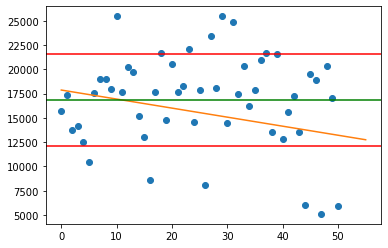

In [13]:
plt.plot(iqrfee,'o')
#plt.plot(maxfee)
#plt.plot(minfee)
plt.plot(yPred);
meanp=np.mean(iqrfee);
plt.axhline(y=meanp,color='g')
stdp = np.std(iqrfee);
plt.axhline(y=meanp+stdp,color='r');
plt.axhline(y=meanp-stdp,color='r');

<AxesSubplot:ylabel='Density'>

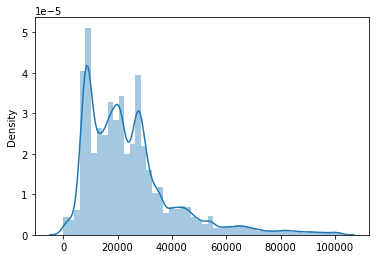

In [14]:
#Vermutung das medians normalverteilt sind 
import itertools
import seaborn as sns;
from numpy import inf
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import mielke
allFeesChained = sorted(list(itertools.chain.from_iterable(allFees)))
sns.distplot(allFeesChained[:-5000])

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Density'>

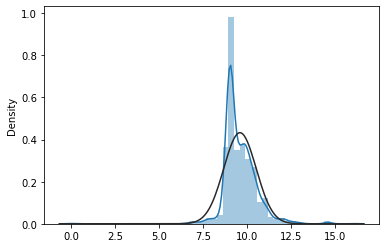

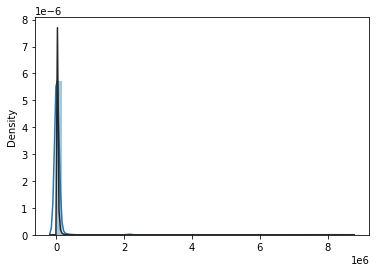

In [15]:
#n = 7
n = 30
#plt.hist(sorted([i.fee for i in blocks[n].transactions])[:len(blocks[n].transactions)-50])
import seaborn as sns;
from numpy import inf
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import mielke
#multipleBlocks1 = [i.fee for i in blocks[1].transactions]
#multipleBlocks2 = [i.fee for i in blocks[2].transactions]
#multipleBlocks3 = [i.fee for i in blocks[3].transactions]
#multipleBlocks4 = [i.fee for i in blocks[4].transactions]
#multipleBlocks5 = [i.fee for i in blocks[5].transactions]
#mbks = [multipleBlocks1,multipleBlocks5,multipleBlocks2,multipleBlocks3,multipleBlocks4]
#multiBlock=sorted(list(itertools.chain.from_iterable(mbks)))
#lnmb = np.log(multiBlock)
#lnmb[lnmb == inf] = 0
#lnmb[lnmb == -inf] = 0

txsData = sorted([i.fee for i in blocks[n].transactions])[:];
txsDataLog = np.log(txsData)

txsDataLog[txsDataLog == -inf] = 0
txsDataLog[txsDataLog == inf] = 0
#öognormalverteilung
plt.figure()
sns.distplot(txsDataLog[:],fit=norm)
plt.figure()
sns.distplot(txsData, fit=lognorm)

In [ ]:
#import csv

#with open('transactions.csv', mode='w') as employee_file:
    #employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    #employee_writer.writerow(['John Smith', 'Accounting', 'November'])